In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# Load dataset
df = pd.read_csv("Updated_Dataset.csv")

In [3]:
df.head()

,No,Age,Male/Female,number sequences marks,number sequences time(s),number sequences duration,number sequences answered,perimeter marks,perimeter time(s),perimeter duration,...,Pre-Marks,Pure math marks (47),Applied math mark (53),No of questions attempted (21),Preferred Study Method,Preferred Lesson,Disliked lesson,fav subject,disliked subject,Peer
0,1,14,M,2,257,257,2,3.0,501,244,...,2,16.0,11.0,15,practicing,angles,set theory,sinhala,geography,24
1,2,14,M,2,212,212,2,3.0,410,198,...,2,19.0,11.0,17,Only school lessons,angles,fractions,sinhala,maths,24
2,3,14,M,2,169,169,2,3.0,357,188,...,9,22.5,17.0,17,Only school lessons,angles,area,english,science,20
3,4,14,M,3,188,188,2,3.0,623,435,...,5,21.0,20.0,18,Only school lessons,angles,none,none,none,24
4,5,14,F,4,253,253,2,2.0,560,307,...,10,18.0,5.0,14,Only school lessons,algebra,area,sinhala,health,10


In [4]:
# Check for NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['indices time(s)', 'volume and capacity time(s)', 'area time(s)', 'probability time(s)']


In [5]:
# Fill NaN values in categorical columns with the most frequent value
for col in nan_columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8764\399510768.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_8764\399510768.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [6]:
# Check for NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [7]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   No                                3000 non-null   int64  
 1   Age                               3000 non-null   int64  
 2   Male/Female                       3000 non-null   object 
 3   number sequences marks            3000 non-null   int64  
 4   number sequences time(s)          3000 non-null   int64  
 5   number sequences duration         3000 non-null   int64  
 6   number sequences answered         3000 non-null   int64  
 7   perimeter marks                   3000 non-null   float64
 8   perimeter time(s)                 3000 non-null   int64  
 9   perimeter duration                3000 non-null   int64  
 10  perimeter answered                3000 non-null   int64  
 11  ratio marks                       3000 non-null   int64  
 12  ratio 

In [8]:
df.describe

<bound method NDFrame.describe of         No  Age Male/Female  number sequences marks  number sequences time(s)  \
0        1   14           M                       2                       257   
1        2   14           M                       2                       212   
2        3   14           M                       2                       169   
3        4   14           M                       3                       188   
4        5   14           F                       4                       253   
...    ...  ...         ...                     ...                       ...   
2995  2996   15           M                       4                        40   
2996  2997   15           F                       3                       186   
2997  2998   13           M                       2                       267   
2998  2999   15           M                       4                       192   
2999  3000   15           M                       2                        

In [9]:
df.dtypes

No                                    int64
Age                                   int64
Male/Female                          object
number sequences marks                int64
number sequences time(s)              int64
number sequences duration             int64
number sequences answered             int64
perimeter marks                     float64
perimeter time(s)                     int64
perimeter duration                    int64
perimeter answered                    int64
ratio marks                           int64
ratio time(s)                         int64
ratio duration                        int64
ratio answered                        int64
fractions/decimals marks              int64
fractions/decimals time(s)            int64
fractions/decimals duration           int64
fractions/decimals answered           int64
indices marks                       float64
indices time(s)                     float64
indices duration                      int64
indices answered                

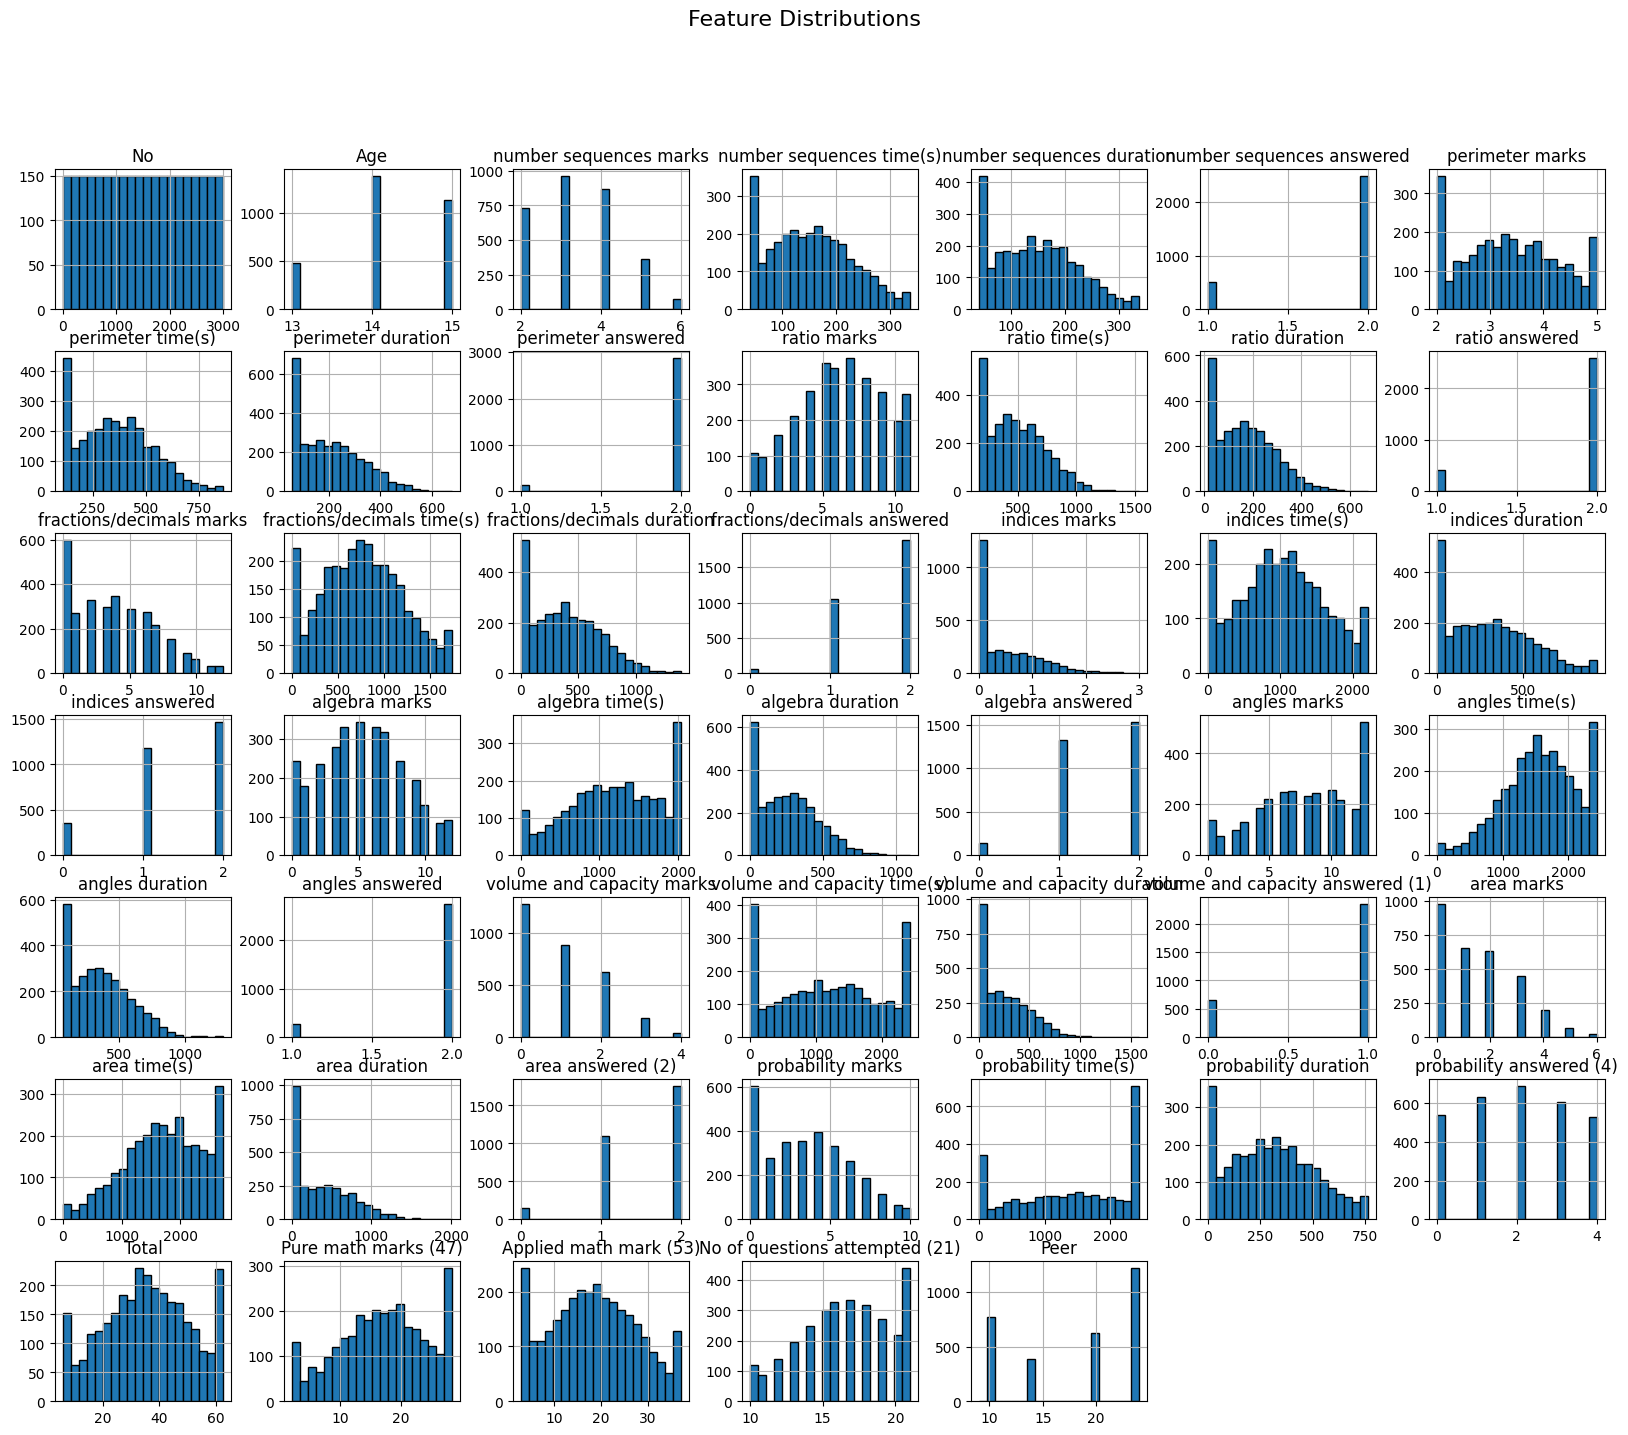

In [10]:
# ---- 1. Data Distribution ----
# Histograms for numerical variables
df.hist(figsize=(20, 16), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

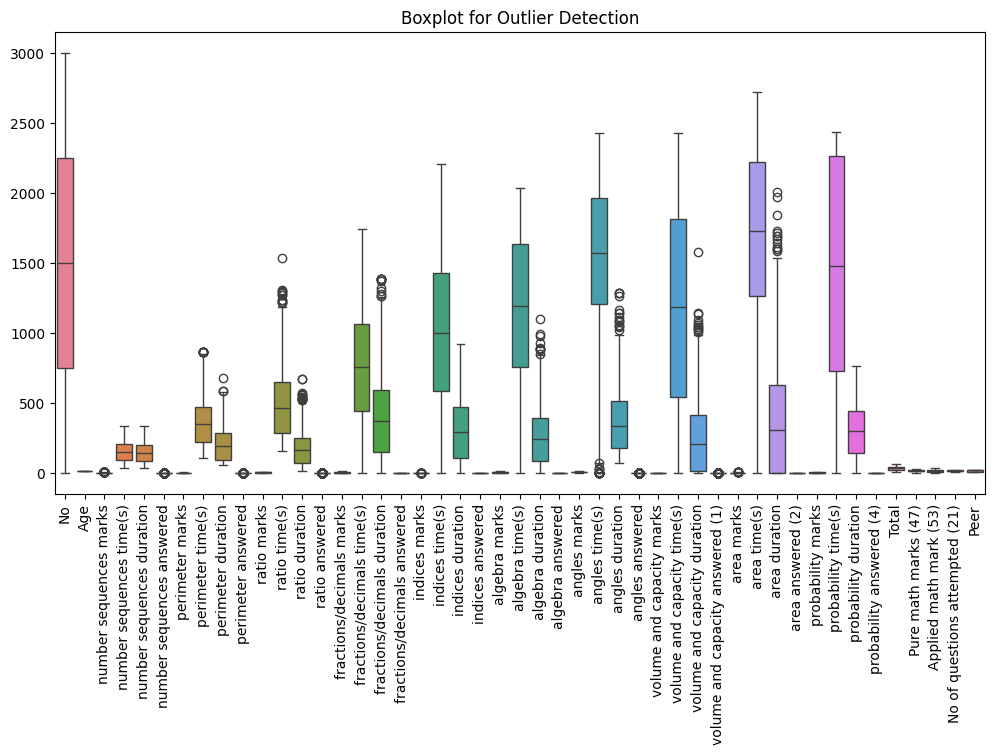

In [11]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

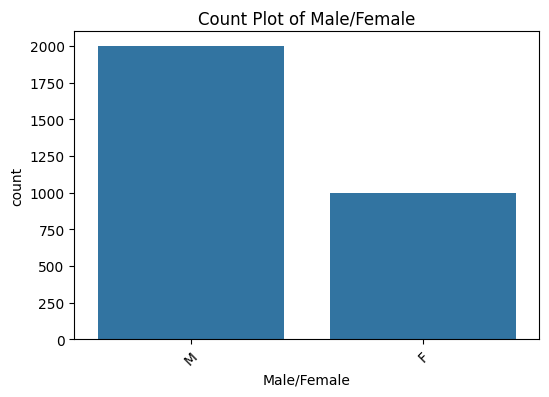

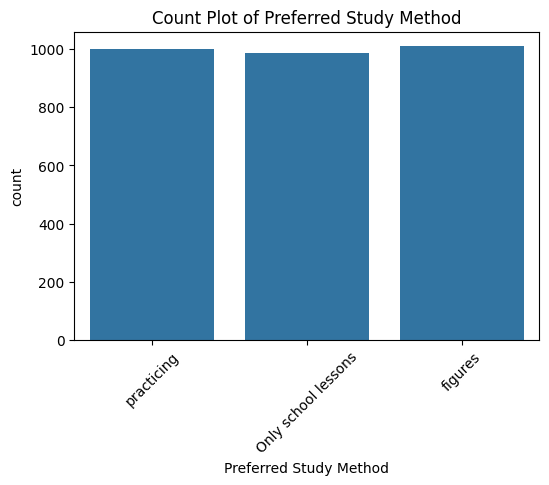

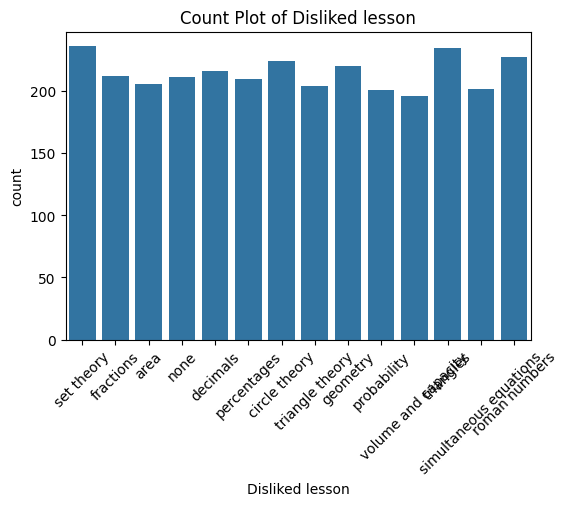

In [12]:
# ---- 2. Categorical Variables Analysis ----
categorical_cols = ["Male/Female", "Preferred Study Method", "Disliked lesson"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()


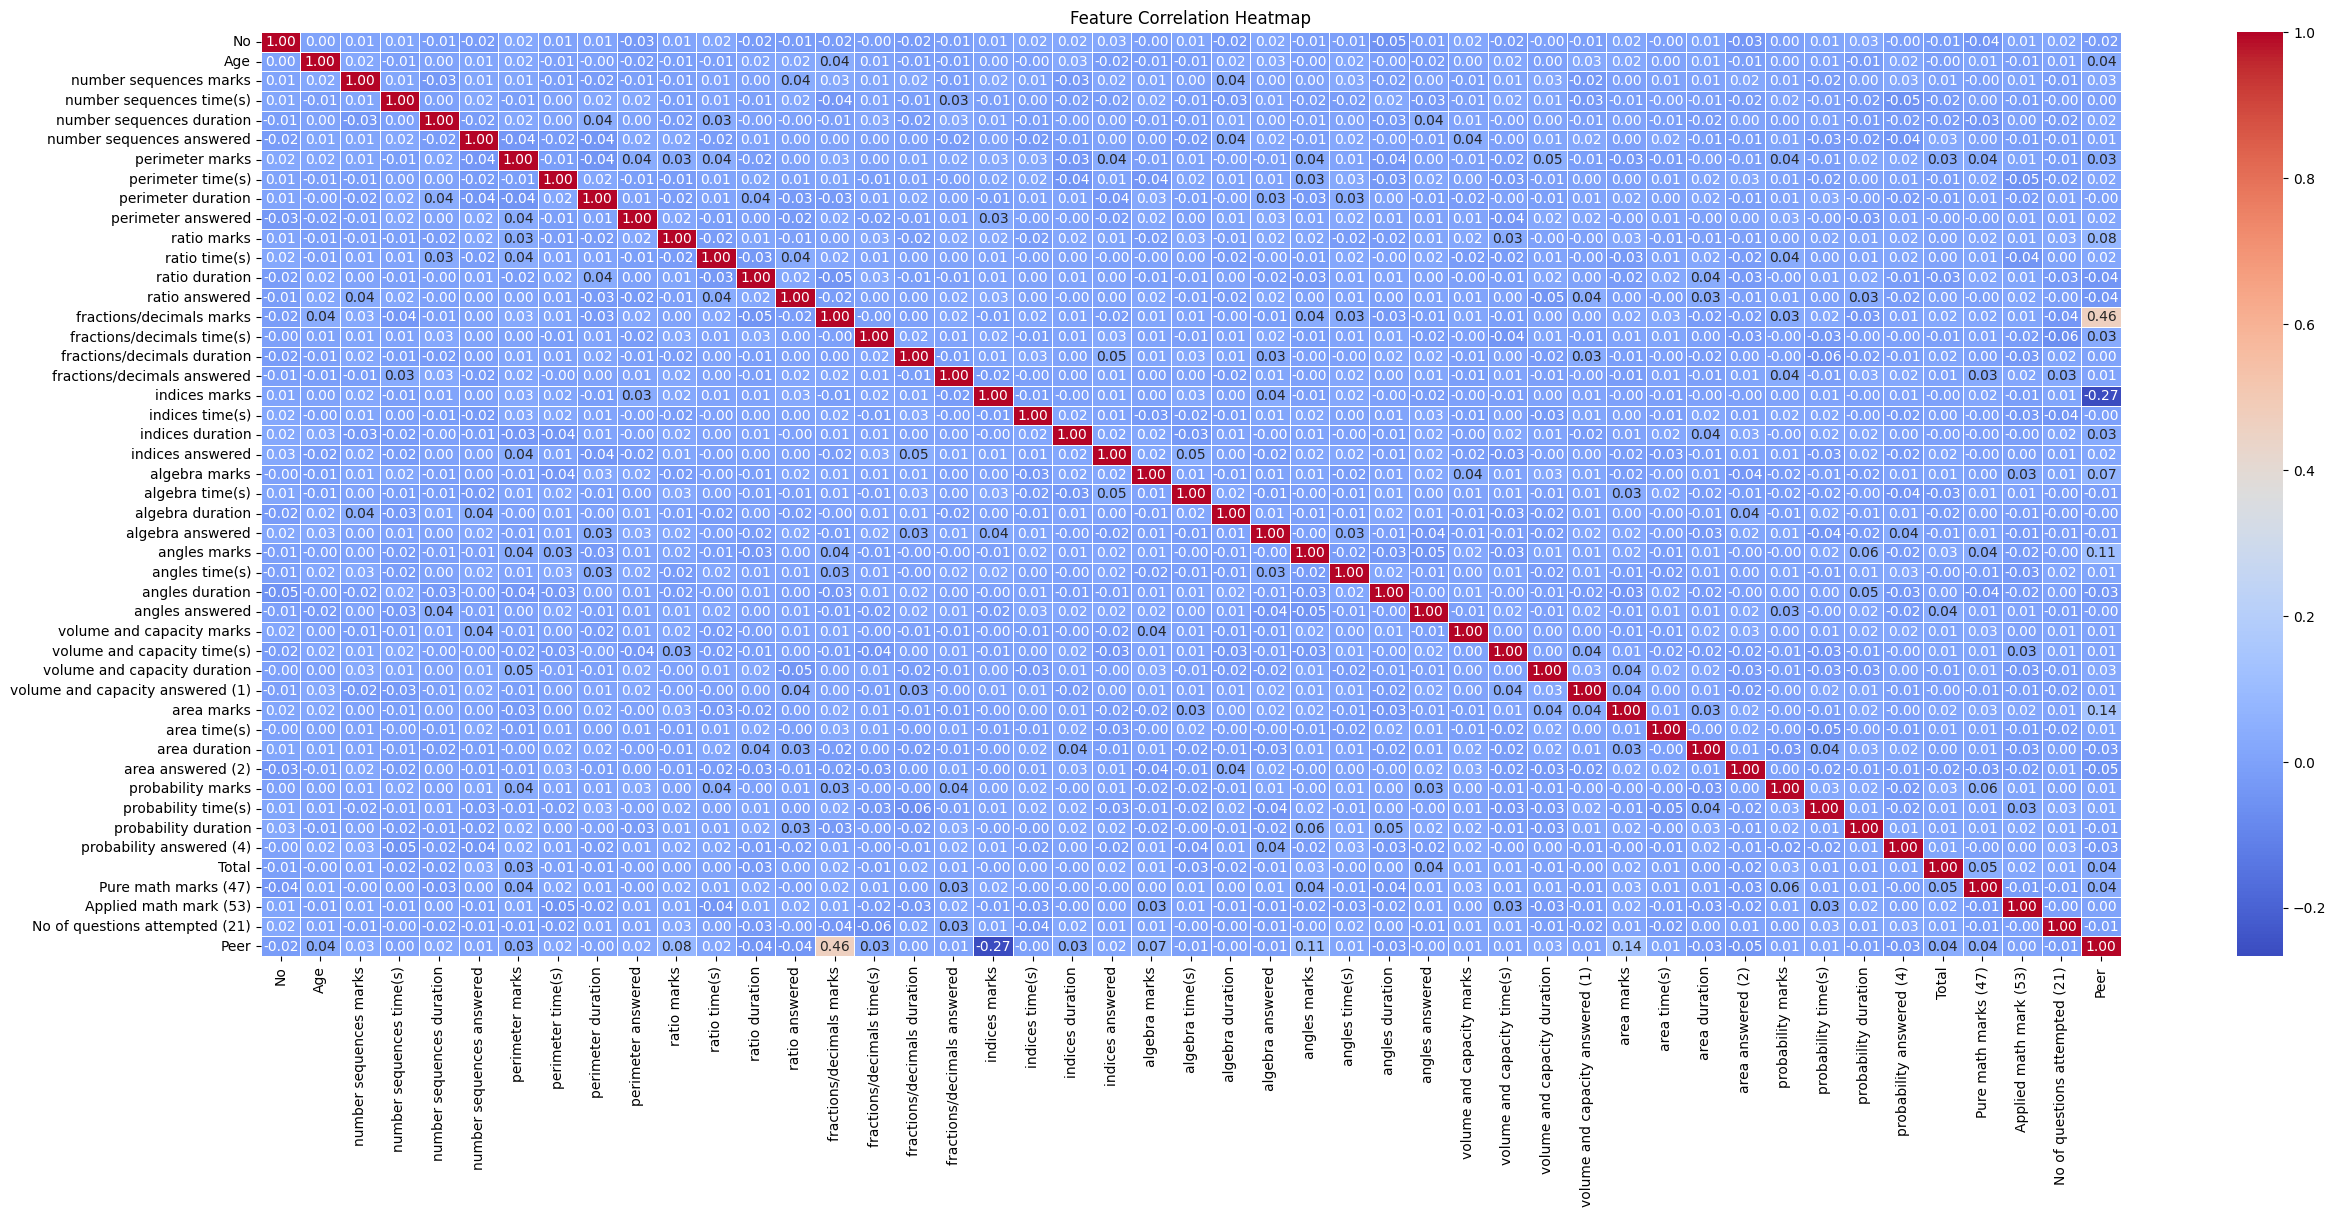

In [13]:
plt.figure(figsize=(30, 12))
corr = df.select_dtypes(include=['int64', 'float64']).corr()  # Select only numerical columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


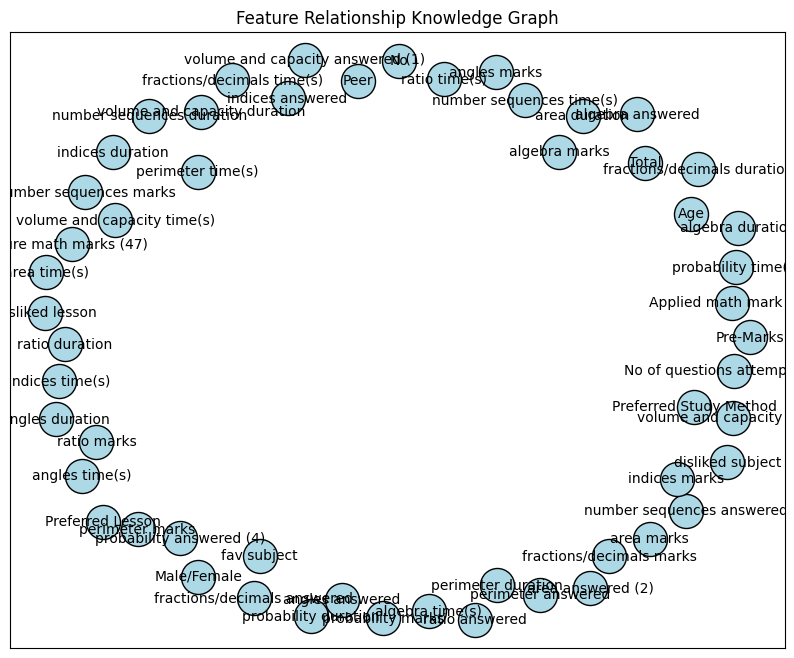

In [14]:
# ---- 4. Knowledge Graph (Before Encoding) ----
G = nx.Graph()

# Adding nodes (features)
for col in df.columns:
    G.add_node(col, size=20)

# Adding edges based on high correlation (threshold 0.5)
threshold = 0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            G.add_edge(corr.columns[i], corr.columns[j], weight=abs(corr.iloc[i, j]))

# Plot the knowledge graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes
edges = G.edges(data=True)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=600, node_color="lightblue", edgecolors="black")

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*3 for (_, _, d) in edges], alpha=0.6)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Feature Relationship Knowledge Graph")
plt.show()

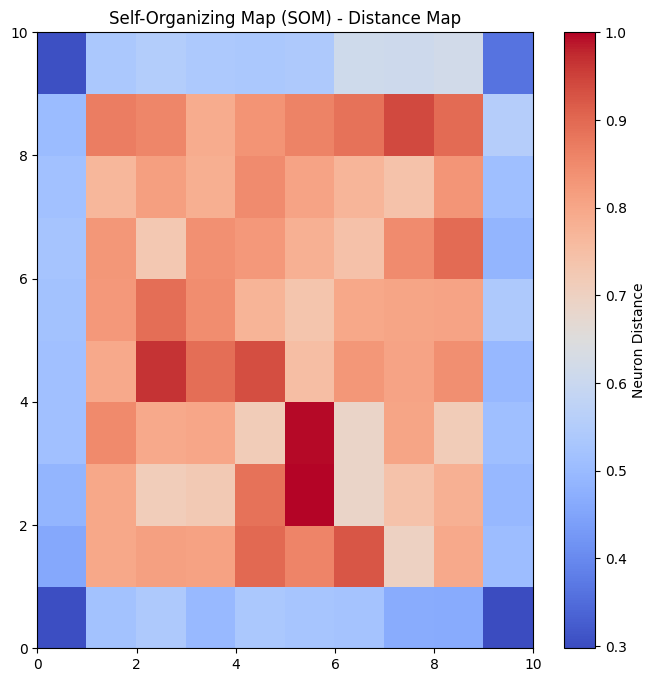

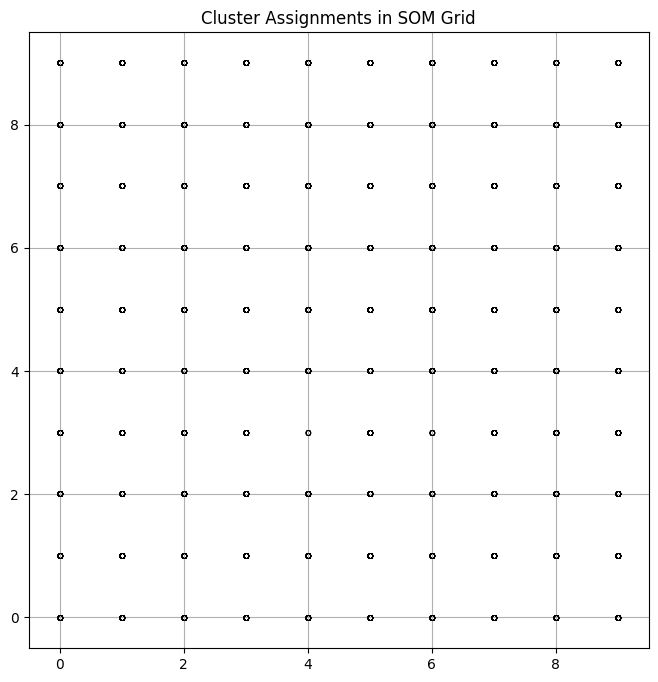

In [15]:
from minisom import MiniSom

# Select numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
data_analyze = df[num_features].values

# Standardize Data
scaler_analyze = StandardScaler()
data_scaled = scaler_analyze.fit_transform(data_analyze)

# SOM Parameters
som_size = (10, 10)  # 10x10 grid
som = MiniSom(som_size[0], som_size[1], data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize and train SOM
som.random_weights_init(data_scaled)
som.train_random(data_scaled, 1000)  # Train for 1000 iterations

# Plot SOM Distance Map (U-Matrix)
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot U-Matrix
plt.colorbar(label='Neuron Distance')
plt.title("Self-Organizing Map (SOM) - Distance Map")
plt.show()

# Cluster Assignment Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data_scaled):
    winner = som.winner(x)  # Get BMU (Best Matching Unit)
    plt.text(winner[0], winner[1], 'o', ha='center', va='center', color='black', fontsize=8)
plt.xlim([-0.5, som_size[0]-0.5])
plt.ylim([-0.5, som_size[1]-0.5])
plt.grid()
plt.title("Cluster Assignments in SOM Grid")
plt.show()

In [16]:
# Define target variable
target_column = "Preferred Lesson"

# Select feature variables (Specify your own selection)
feature_columns = ["Male/Female", "number sequences marks", "number sequences time(s)", "perimeter marks", "perimeter time(s)", "ratio marks", "ratio time(s)", "fractions/decimals marks", "fractions/decimals time(s)", "indices marks", "indices time(s)", "algebra marks", "algebra time(s)", "angles marks", "angles time(s)", "volume and capacity marks", "volume and capacity time(s)", "area marks", "area time(s)", "probability marks", "probability time(s)", "Preferred Study Method", "Disliked lesson"]

In [17]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [18]:
# Encode categorical variables
encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

C:\Users\admin\AppData\Local\Temp\ipykernel_8764\3575964935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_8764\3575964935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_8764\3575964935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [19]:
# Encode target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [20]:
# Scale numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['int64', 'float64']).columns]
)


C:\Users\admin\AppData\Local\Temp\ipykernel_8764\664760796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(


In [21]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear',probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Random Forest Accuracy: 0.9183
SVM Accuracy: 0.9750
KNN Accuracy: 0.6333


In [23]:
# Save the best model, encoder, and scaler
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

with open("label_encoders.pkl", "wb") as encoder_file:
    pickle.dump(encoders, encoder_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("y_encoders.pkl", "wb") as encoder_file:
    pickle.dump(y_encoder, encoder_file)

print(f"Best model ({best_model.__class__.__name__}) saved with accuracy: {best_accuracy:.4f}")

Best model (SVC) saved with accuracy: 0.9750


In [24]:
# Function to make predictions with top 5 probabilities
def predict_top_5_lessons(sample):
    # Load saved model, encoders, and scaler
    with open("best_model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
    
    with open("label_encoders.pkl", "rb") as encoder_file:
        encoders = pickle.load(encoder_file)
    
    with open("scaler.pkl", "rb") as scaler_file:
        scaler = pickle.load(scaler_file)
    
    with open("y_encoders.pkl", "rb") as y_encoder_file:
        y_encoder = pickle.load(y_encoder_file)
    
    # Convert sample to DataFrame
    sample_df = pd.DataFrame([sample], columns=feature_columns)
    
    # Encode categorical variables
    for col in sample_df.select_dtypes(include=['object']).columns:
        if col in encoders:
            sample_df[col] = encoders[col].transform(sample_df[col])
    
    # Scale numerical features
    sample_df[sample_df.select_dtypes(include=['int64', 'float64']).columns] = scaler.transform(
        sample_df[sample_df.select_dtypes(include=['int64', 'float64']).columns]
    )
    
    # Predict probabilities
    probabilities = model.predict_proba(sample_df)[0]
    top_5_indices = np.argsort(probabilities)[-5:][::-1]
    top_5_classes = y_encoder.inverse_transform(top_5_indices)
    top_5_probs = probabilities[top_5_indices]
    
    return list(zip(top_5_classes, top_5_probs))

# Example usage
sample_input = {"Male/Female": "M", "number sequences marks": 75, "number sequences time(s)": 3, "perimeter marks": 80, "perimeter time(s)": 3, "ratio marks": 85, "ratio time(s)": 3, "fractions/decimals marks": 70, "fractions/decimals time(s)": 3, "indices marks": 60, "indices time(s)": 3, "algebra marks": 78, "algebra time(s)": 3, "angles marks": 82, "angles time(s)": 2, "volume and capacity marks": 88, "volume and capacity time(s)": 4, "area marks": 90, "area time(s)": 4, "probability marks": 77, "probability time(s)": 1, "Preferred Study Method": "figures", "Disliked lesson": "fractions"}

predicted_lessons = predict_top_5_lessons(sample_input)
print("Top 5 Predicted Lessons:")
for lesson, prob in predicted_lessons:
    print(f"{lesson}: {prob:.4f}")


Top 5 Predicted Lessons:
perimeter: 0.8968
area: 0.0999
angles: 0.0030
fractions/decimals: 0.0002
ratio: 0.0000
